# BUAN 6341.002 Applied Machine Learning Project

## Airline Passenger Satisfaction

In [13]:
import numpy as np
import pandas as pd  # for data analytics

# The two packages below are for plotting
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [47]:
# data loading
data = pd.read_csv('airline_passenger_satisfaction.csv')

In [48]:
#Displaying the top ten rows in the dataset
data.head(100)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Female,34,Returning,Personal,Economy Plus,173,0,0.0,4,...,5,3,5,3,3,4,2,3,4,Neutral or Dissatisfied
96,97,Female,18,First-time,Business,Economy Plus,215,0,0.0,5,...,1,1,4,1,1,5,3,1,1,Neutral or Dissatisfied
97,98,Male,44,Returning,Business,Business,562,0,11.0,4,...,4,5,4,5,3,4,4,4,4,Satisfied
98,99,Female,52,Returning,Business,Business,562,27,18.0,5,...,4,5,4,3,3,4,5,4,4,Satisfied


In [49]:
# shape of the dataframe
data.shape   #There are 129880 observations and 24 variables/columns

(129880, 24)

In [50]:
# variable names
data.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [51]:
# dropping duplicates

data.drop_duplicates() # same dimension, no duplicates.

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [24]:
data.dropna(axis = 'columns')
#Observed Column: 'Arrival Delay' has missing values and so the column is omitted from output

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,4,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,5,3,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,5,2,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,4,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [52]:
#The missing values are imputed with the mean of the column values.
data['Arrival Delay']=data['Arrival Delay'].fillna(data['Arrival Delay'].mean())

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129880 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [54]:
# Identifying the unique values in each columns
unique_values = []
for x in data.columns:
    unique_values.append([x, len(data[x].unique())])
    #prinfting unique values
    print(x ,':', len(data[x].unique()))
pd.DataFrame(unique_values).head(100)

ID : 129880
Gender : 2
Age : 75
Customer Type : 2
Type of Travel : 2
Class : 3
Flight Distance : 3821
Departure Delay : 466
Arrival Delay : 473
Departure and Arrival Time Convenience : 6
Ease of Online Booking : 6
Check-in Service : 6
Online Boarding : 6
Gate Location : 6
On-board Service : 6
Seat Comfort : 6
Leg Room Service : 6
Cleanliness : 6
Food and Drink : 6
In-flight Service : 6
In-flight Wifi Service : 6
In-flight Entertainment : 6
Baggage Handling : 5
Satisfaction : 2


,0,1
0,ID,129880
1,Gender,2
2,Age,75
3,Customer Type,2
4,Type of Travel,2
5,Class,3
6,Flight Distance,3821
7,Departure Delay,466
8,Arrival Delay,473
9,Departure and Arrival Time Convenience,6


In [55]:
# Removing non applicable entry ~ 0.
data['Departure and Arrival Time Convenience'] = data['Departure and Arrival Time Convenience'].replace([0],3)
data['Ease of Online Booking'] = data['Ease of Online Booking'].replace([0],3)
data['Check-in Service'] = data['Check-in Service'].replace([0],3)
data['Online Boarding'] = data['Online Boarding'].replace([0],3)
data['Seat Comfort'] = data['Seat Comfort'].replace([0],3)
data['Leg Room Service'] = data['Leg Room Service'].replace([0],3)
data['Cleanliness'] = data['Cleanliness'].replace([0],3)
data['Food and Drink'] = data['Food and Drink'].replace([0],3)
data['In-flight Service'] = data['In-flight Service'].replace([0],3)
data['In-flight Wifi Service'] = data['In-flight Wifi Service'].replace([0],3)
data['In-flight Entertainment'] = data['In-flight Entertainment'].replace([0],3)

data.groupby(['Departure and Arrival Time Convenience']).size(), data.groupby(['Ease of Online Booking']).size(), data.groupby(['Check-in Service']).size(), data.groupby(['Online Boarding']).size(), data.groupby(['Seat Comfort']).size(), data.groupby(['Leg Room Service']).size(), data.groupby(['Cleanliness']).size()

(Departure and Arrival Time Convenience
 1    19409
 2    21534
 3    29059
 4    31880
 5    27998
 dtype: int64,
 Ease of Online Booking
 1    21886
 2    30051
 3    36075
 4    24444
 5    17424
 dtype: int64,
 Check-in Service
 1    16108
 2    16102
 3    35454
 4    36333
 5    25883
 dtype: int64,
 Online Boarding
 1    13261
 2    21934
 3    30197
 4    38468
 5    26020
 dtype: int64,
 Seat Comfort
 1    15108
 2    18529
 3    23329
 4    39756
 5    33158
 dtype: int64,
 Leg Room Service
 1    12895
 2    24540
 3    25654
 4    35886
 5    30905
 dtype: int64,
 Cleanliness
 1    16729
 2    20113
 3    30653
 4    33969
 5    28416
 dtype: int64)

In [56]:
data.groupby(['Food and Drink']).size(), data.groupby(['In-flight Service']).size(), data.groupby(['In-flight Wifi Service']).size()

(Food and Drink
 1    16051
 2    27383
 3    27926
 4    30563
 5    27957
 dtype: int64,
 In-flight Service
 1     8862
 2    14308
 3    25321
 4    47323
 5    34066
 dtype: int64,
 In-flight Wifi Service
 1    22328
 2    32320
 3    36101
 4    24775
 5    14356
 dtype: int64)

In [57]:
# Obtaining summary statistics

# data.describe()

pers = [0.01, 0.05, 0.95, .99]

data.describe(percentiles = pers)

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.00000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.211919,2.88812,3.306290,3.323776,2.976925,3.383023,3.441384,3.364690,3.286649,3.207823,3.642308,2.819148,3.358492,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.407410,1.351438,1.27190,1.266152,1.252998,1.278520,1.287099,1.319255,1.296609,1.313242,1.326015,1.176459,1.239631,1.333470,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1%,1299.790000,8.000000,101.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5%,6494.950000,15.000000,176.950000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.00000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
95%,123386.050000,64.000000,3380.000000,77.000000,78.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
99%,128581.210000,70.000000,3884.000000,180.000000,182.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## 3. Multivariate Data Analysis

### 3.1 Correlation Matrix and Heatmap

To create correlation matrix, we used syntax: **.corr()** 
Note - The variables should be specified in a list. 

We used syntax **sns.heatmap()** to obtain heatmap.


In [58]:
# Correlation matrix

# Omitting categorical columns as Correlation matrix cannot be applied to categorical columns
df = data.drop(columns = ['ID', 'Gender', 'Customer Type', 'Type of Travel','Class'])
my_matrix = df.corr()
my_matrix


,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
Age,1.000000,0.099459,-0.009041,-0.011229,-0.008747,0.013140,0.033482,0.185920,-0.000398,0.057078,0.159145,0.050024,0.052317,0.022197,-0.051273,0.009600,0.074786,-0.047991
Flight Distance,0.099459,1.000000,0.002402,-0.001932,-0.069026,0.049198,0.073592,0.197674,0.005520,0.111194,0.157649,0.131092,0.095660,0.057292,0.059448,0.010312,0.130668,0.064855
Departure Delay,-0.009041,0.002402,1.000000,0.960329,-0.005936,-0.011510,-0.018664,-0.029507,0.005973,-0.030486,-0.027915,0.013113,-0.014446,-0.022467,-0.054478,-0.025237,-0.027041,-0.004105
Arrival Delay,-0.011229,-0.001932,0.960329,1.000000,-0.007382,-0.013450,-0.021568,-0.033241,0.005649,-0.034735,-0.030373,0.009801,-0.016433,-0.024944,-0.059809,-0.027570,-0.030241,-0.007923
Departure and Arrival Time Convenience,-0.008747,-0.069026,-0.005936,-0.007382,1.000000,0.500055,0.116922,0.058261,0.494506,0.077142,-0.008877,-0.002165,0.003142,-0.007227,0.080971,0.372089,-0.031339,0.079498
Ease of Online Booking,0.013140,0.049198,-0.011510,-0.013450,0.500055,1.000000,0.019730,0.363960,0.497402,0.033580,0.028191,0.081933,0.014637,0.026596,0.025817,0.675589,0.032074,0.026559
Check-in Service,0.033482,0.073592,-0.018664,-0.021568,0.116922,0.019730,1.000000,0.223628,-0.039325,0.244634,0.189937,0.153835,0.176533,0.084604,0.237570,0.061527,0.119447,0.234499
Online Boarding,0.185920,0.197674,-0.029507,-0.033241,0.058261,0.363960,0.223628,1.000000,-0.002305,0.165345,0.434191,0.130948,0.345675,0.245928,0.085919,0.458657,0.293759,0.093933
Gate Location,-0.000398,0.005520,0.005973,0.005649,0.494506,0.497402,-0.039325,-0.002305,1.000000,-0.029019,0.002816,-0.005388,-0.005833,-0.003071,0.000389,0.353724,0.002870,0.000972
On-board Service,0.057078,0.111194,-0.030486,-0.034735,0.077142,0.033580,0.244634,0.165345,-0.029019,1.000000,0.130557,0.359984,0.122051,0.057119,0.551409,0.123512,0.418447,0.520296


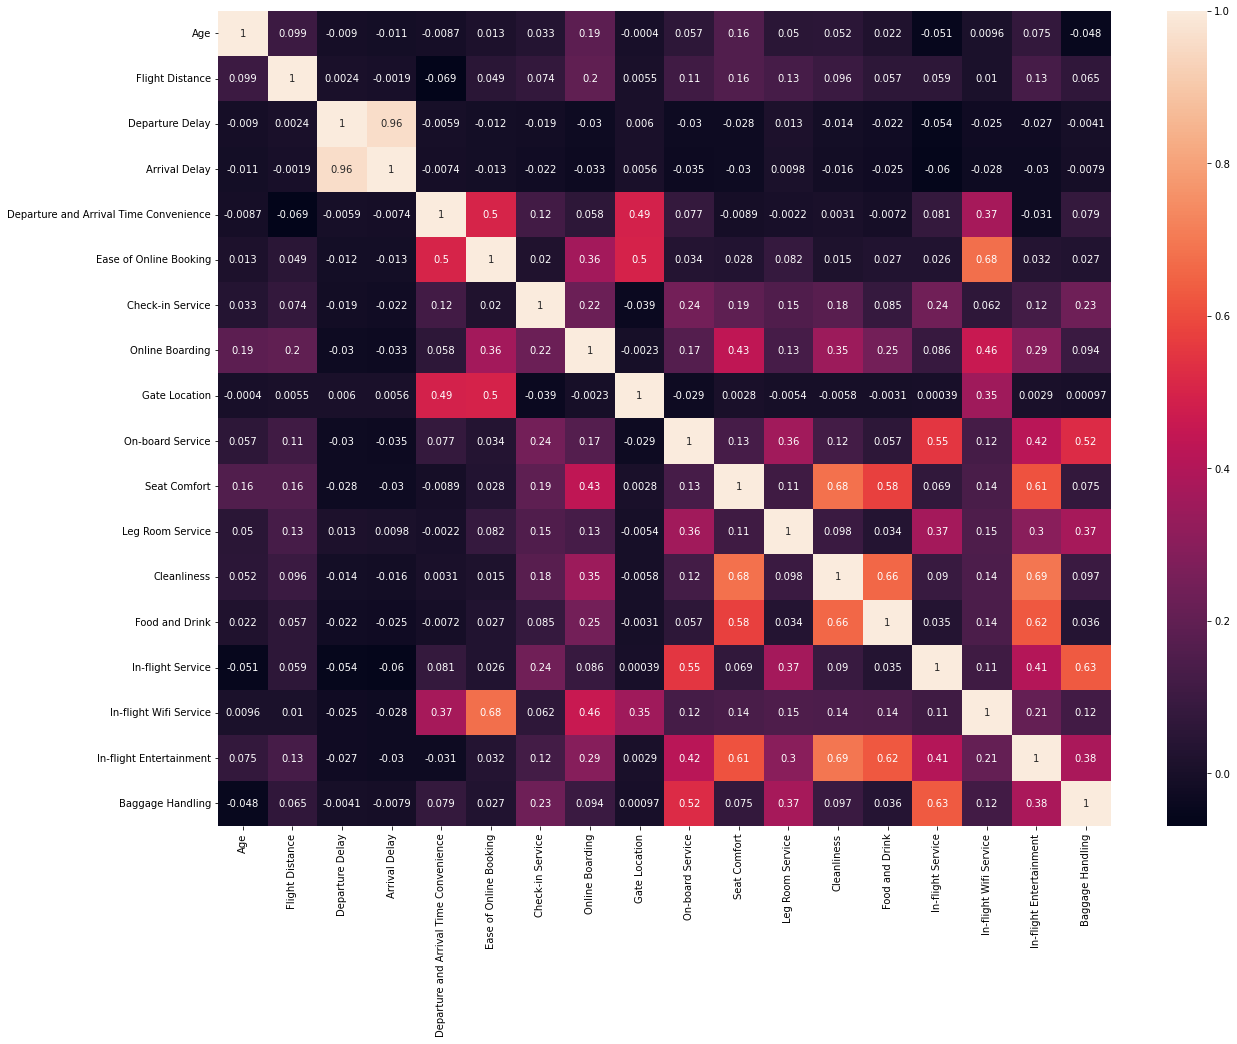

In [59]:
# heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Flight Distance'}>,
        <AxesSubplot:title={'center':'Departure Delay'}>,
        <AxesSubplot:title={'center':'Arrival Delay'}>],
       [<AxesSubplot:title={'center':'Departure and Arrival Time Convenience'}>,
        <AxesSubplot:title={'center':'Ease of Online Booking'}>,
        <AxesSubplot:title={'center':'Check-in Service'}>,
        <AxesSubplot:title={'center':'Online Boarding'}>],
       [<AxesSubplot:title={'center':'Gate Location'}>,
        <AxesSubplot:title={'center':'On-board Service'}>,
        <AxesSubplot:title={'center':'Seat Comfort'}>,
        <AxesSubplot:title={'center':'Leg Room Service'}>],
       [<AxesSubplot:title={'center':'Cleanliness'}>,
        <AxesSubplot:title={'center':'Food and Drink'}>,
        <AxesSubplot:title={'center':'In-flight Service'}>,
        <AxesSubplot:title={'center':'In-flight Wifi Service'}>],
       [<AxesSubplot:title={'center':'In-flight En

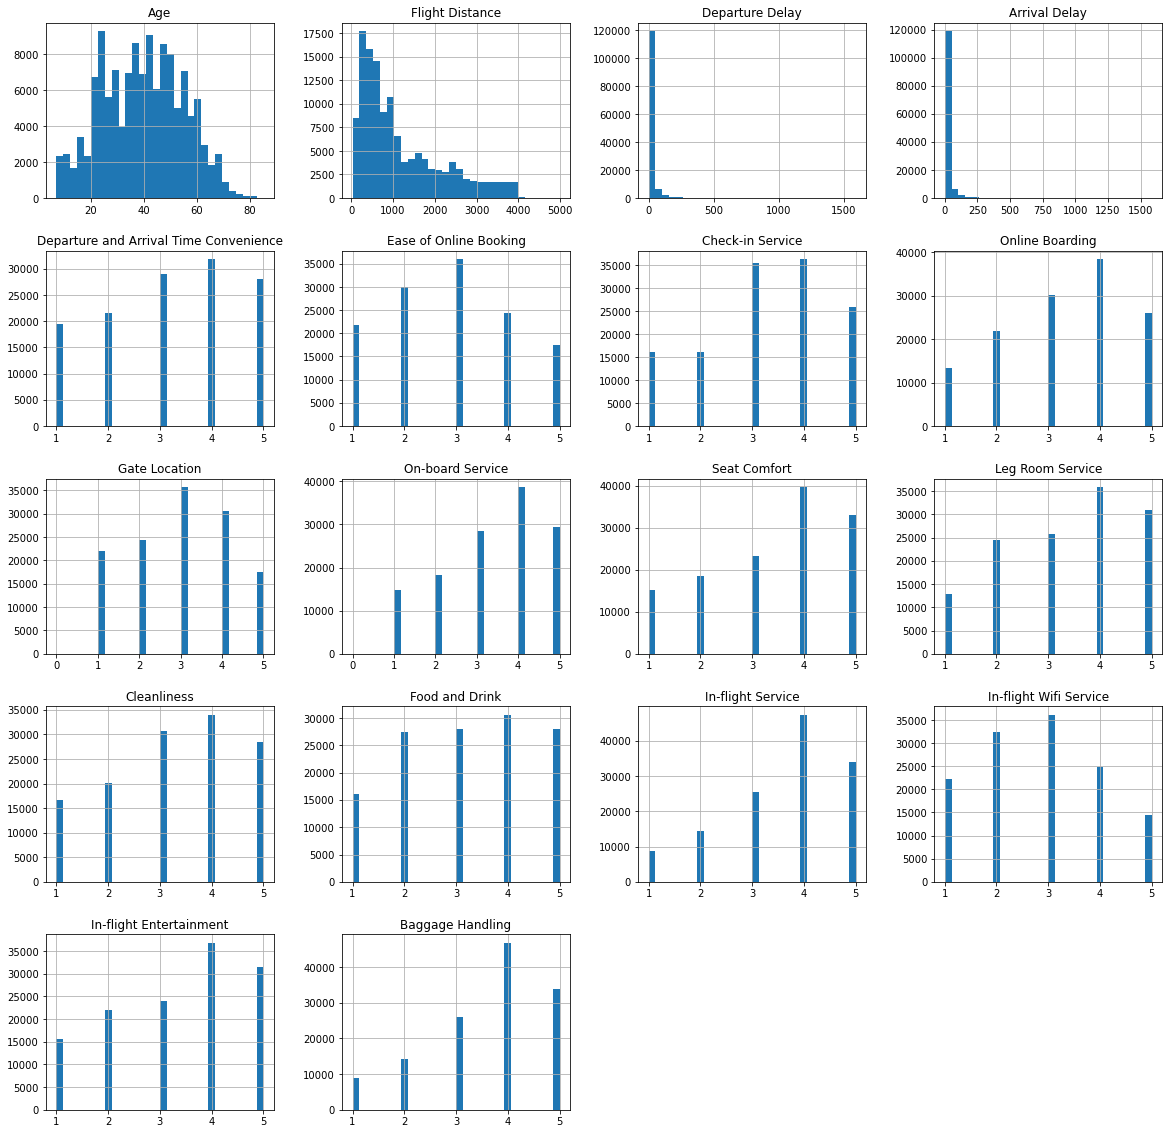

In [60]:
df.hist(bins=30,figsize=[20,20])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 19 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Age                                     129880 non-null  int64  
 1   Flight Distance                         129880 non-null  int64  
 2   Departure Delay                         129880 non-null  int64  
 3   Arrival Delay                           129880 non-null  float64
 4   Departure and Arrival Time Convenience  129880 non-null  int64  
 5   Ease of Online Booking                  129880 non-null  int64  
 6   Check-in Service                        129880 non-null  int64  
 7   Online Boarding                         129880 non-null  int64  
 8   Gate Location                           129880 non-null  int64  
 9   On-board Service                        129880 non-null  int64  
 10  Seat Comfort                            1298

In [62]:
## One hot encoding of categorical variables
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
# data['Class'].unique()

encoder = OneHotEncoder(handle_unknown='ignore')
#perform one-hot encoding on 'Gender' column 
encoder_df = pd.DataFrame(encoder.fit_transform(data[['Gender']]).toarray())
encoder_df.columns = ['Male', 'Female']
print(encoder_df.head(5))

encoder1 = OneHotEncoder(handle_unknown='ignore')
#perform one-hot encoding on 'Customer Type' column 
encoder1_df = pd.DataFrame(encoder1.fit_transform(data[['Customer Type']]).toarray())
encoder1_df.columns = ['First-time', 'Returning']
print(encoder1_df.head(5))

encoder2 = OneHotEncoder(handle_unknown='ignore')
#perform one-hot encoding on 'Type of Travel' column 
encoder2_df = pd.DataFrame(encoder2.fit_transform(data[['Type of Travel']]).toarray())
encoder2_df.columns = ['Busines', 'Personal']
print(encoder2_df.head(5))

encoder3 = OneHotEncoder(handle_unknown='ignore')
#perform one-hot encoding on 'Class' column 
encoder3_df = pd.DataFrame(encoder3.fit_transform(data[['Class']]).toarray())
encoder3_df.columns = ['Business', 'Economy', 'Economy Plus']
print(encoder3_df.head(5))

   Male  Female
0   0.0     1.0
1   1.0     0.0
2   0.0     1.0
3   0.0     1.0
4   1.0     0.0
   First-time  Returning
0         1.0        0.0
1         0.0        1.0
2         0.0        1.0
3         0.0        1.0
4         0.0        1.0
   Busines  Personal
0      1.0       0.0
1      1.0       0.0
2      1.0       0.0
3      1.0       0.0
4      1.0       0.0
   Business  Economy  Economy Plus
0       1.0      0.0           0.0
1       1.0      0.0           0.0
2       1.0      0.0           0.0
3       1.0      0.0           0.0
4       1.0      0.0           0.0


In [63]:
df.head()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,48,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,35,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,41,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,50,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,49,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [64]:
df = df.join(encoder_df)
df = df.join(encoder1_df)
df = df.join(encoder2_df)
df = df.join(encoder3_df)

In [65]:
df.head(5)

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,Satisfaction,Male,Female,First-time,Returning,Busines,Personal,Business,Economy,Economy Plus
0,48,821,2,5.0,3,3,4,3,3,3,...,Neutral or Dissatisfied,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,35,821,26,39.0,2,2,3,5,2,5,...,Satisfied,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,41,853,0,0.0,4,4,4,5,4,3,...,Satisfied,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,50,1905,0,0.0,2,2,3,4,2,5,...,Satisfied,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,49,3470,0,1.0,3,3,3,5,3,3,...,Satisfied,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [66]:
pd.set_option('display.max_columns', None) #To display all columns. If max_cols is exceeded, 
# switch to truncate view. Depending on `large_repr`, objects are either centrally truncated or 
#printed as a summary view. 'None' value means unlimited.
df.head()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Male,Female,First-time,Returning,Busines,Personal,Business,Economy,Economy Plus
0,48,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,35,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,41,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,50,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,49,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [67]:
df['Satisfaction2'] = np.where(df['Satisfaction']== 'Satisfied', 1, 0)
df.drop('Satisfaction', inplace=True, axis=1)
df = df.rename(columns={'Satisfaction2': 'Satisfied'})

In [68]:
df.head()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Male,Female,First-time,Returning,Busines,Personal,Business,Economy,Economy Plus,Satisfied
0,48,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,35,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1
2,41,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1
3,50,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1
4,49,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1


In [69]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Satisfied'])
y = df[['Satisfied']]
X_train, X_test, y_train, y_test = train_test_split( X,y,test_size = 0.3, random_state = 42 )

## Logistics Regression

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logreg = LogisticRegression() 
logreg.fit(X_train, y_train)

##Test Accuracy
test_score = logreg.score(X_test, y_test)

print("Accuracy of test is:", test_score)

##Train Accuracy 
train_score = logreg.score(X_train, y_train)
                            
print("Accuracy of training is:", logreg.score(X_train, y_train))

y_test_pred = logreg.predict(X_test)


Accuracy of test is: 0.8289446668719844
Accuracy of training is: 0.8320317655858155


TP is: 14550
TN is: 17749
FP is: 4361
FN is: 2304


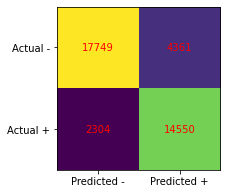

In [71]:
#confusion_matrix
rslt = confusion_matrix(y_test, y_test_pred)
print("TP is:", rslt[1, 1])
print("TN is:", rslt[0, 0])
print("FP is:", rslt[0 ,1])
print("FN is:", rslt[1, 0])
cm = rslt

fig, ax = plt.subplots(figsize=(3,3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted -', 'Predicted +'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual -', 'Actual +'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [72]:
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('Accuracy score:', accuracy_score(y_test, y_test_pred))
print('F1 score:', f1_score(y_test, y_test_pred))

proba = logreg.predict_proba(X_test)[:, 1]

Precision score: 0.7693934746972662
Recall score: 0.8632965468138127
Accuracy score: 0.8289446668719844
F1 score: 0.8136446246330211


In [73]:
precision, recall, threshold = precision_recall_curve(y_test, proba)

Text(0, 0.5, 'Precision')

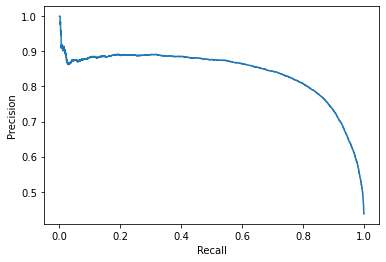

In [74]:
#Plot Figure
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')


AUC for logistic regression: 0.8989170059601986


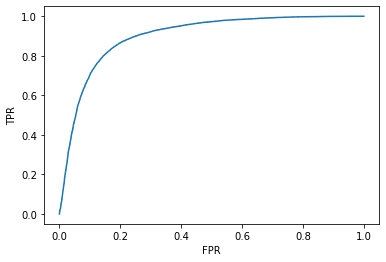

In [75]:
fpr, tpr, threshold = roc_curve(y_test, proba)
# Generate Figure
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
print("AUC for logistic regression:", roc_auc_score(y_test, proba))

In [ ]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# svc_kernel_basic = SVC(random_state = 0, kernel = 'rbf')
# svc_kernel_basic.fit(X_train, y_train)
# svc_kernel_basic.score(X_test, y_test)
# base_svm = SVC(random_state = 0, kernel = 'rbf')
# param_svc_kernel = {'C':  [0.001, 0.01, 0.1, 1, 10, 100, 10000],
#                     'gamma':  [0.0001, 0.001,0.001,0.1,1,10]   }
# grid_svm = GridSearchCV(base_svm, param_svc_kernel, cv = 5, n_jobs=2)

# grid_svm.fit(X_train, y_train)
# grid_svm.best_params_

C:\Users\amith\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
tree_complete = DecisionTreeClassifier(random_state = 0, criterion = 'entropy')
tree_complete.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [77]:
print("Accuracy of test is:",tree_complete.score(X_test, y_test))
print("Accuracy of training is:",tree_complete.score(X_train, y_train))

Accuracy of test is: 0.9281387947849297
Accuracy of training is: 1.0


In [ ]:
#Addressing Overfitting
opt_tree = DecisionTreeClassifier(random_state = 0, criterion = 'entropy')

dt_params = {'max_depth':  range(1,8)         ,
             'min_samples_split':   range(2,8),
             'max_leaf_nodes':    range(2,8)   }

grid_tree = GridSearchCV(opt_tree, dt_params)

grid_tree.fit(X_train, y_train)

In [38]:
print("Accuracy of test is:",grid_tree.score(X_test, y_test))
print("Accuracy of training is:",grid_tree.score(X_train, y_train))

Accuracy of test is: 0.870059542141464
Accuracy of training is: 0.8714197720973206


In [39]:
grid_tree.best_params_

{'max_depth': 4, 'max_leaf_nodes': 7, 'min_samples_split': 2}

In [40]:
y_test_pred_dt = grid_tree.predict(X_test)

TP is: 14444
TN is: 18804
FP is: 3306
FN is: 2410


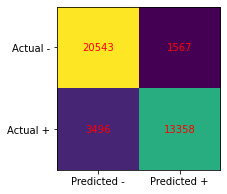

In [103]:
rslt_dt = confusion_matrix(y_test, y_test_pred_dt)

print("TP is:", rslt[1, 1])
print("TN is:", rslt[0, 0])
print("FP is:", rslt[0 ,1])
print("FN is:", rslt[1, 0])
cm = rslt_dt

fig, ax = plt.subplots(figsize=(3,3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted -', 'Predicted +'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual -', 'Actual +'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [42]:
print('Precision score:', precision_score(y_test, y_test_pred_dt))
print('Recall score:', recall_score(y_test, y_test_pred_dt))
print('Accuracy score:', accuracy_score(y_test, y_test_pred_dt))
print('F1 score:', f1_score(y_test, y_test_pred_dt))

proba_dt = grid_tree.predict_proba(X_test)[:, 1]

Precision score: 0.8950083752093803
Recall score: 0.7925714963806811
Accuracy score: 0.870059542141464
F1 score: 0.8406809528304856


In [43]:
precision, recall, threshold = precision_recall_curve(y_test, proba_dt)

Text(0, 0.5, 'Precision')

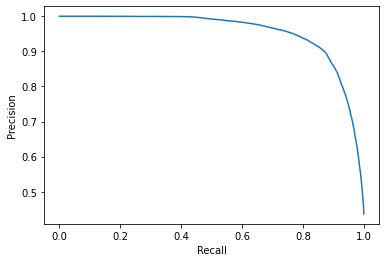

In [110]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')


AUC for Decision Tree : 0.9062735853081916


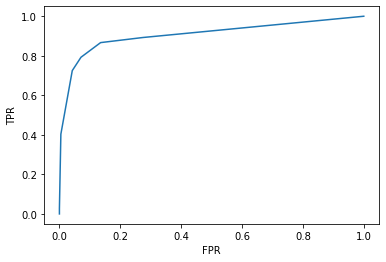

In [109]:
fpr, tpr, threshold = roc_curve(y_test, proba_dt)
# Generate Figure
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
print("AUC for Decision Tree :", roc_auc_score(y_test, proba_dt))

## Ensemble method (DT With Bagging)

In [47]:
from sklearn.ensemble import BaggingClassifier
dt=DecisionTreeClassifier(random_state=42)

In [48]:
bag_clf = BaggingClassifier(
    dt, n_estimators=200,
    max_samples=100, bootstrap=True, random_state=42)

In [49]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=200, random_state=42)

In [50]:
y_pred = bag_clf.predict(X_test)
print("Accuracy of test is:",bag_clf.score(X_test, y_test))
print("Accuracy of training is:",bag_clf.score(X_train, y_train))

Accuracy of test is: 0.8953136228313315
Accuracy of training is: 0.8967838444278234


In [51]:
y_test_pred_em = bag_clf.predict(X_test)

TP is: 14444
TN is: 18804
FP is: 3306
FN is: 2410


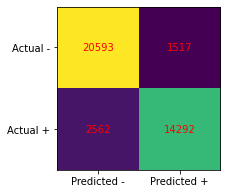

In [104]:
rslt_em = confusion_matrix(y_test, y_test_pred_em)
print("TP is:", rslt[1, 1])
print("TN is:", rslt[0, 0])
print("FP is:", rslt[0 ,1])
print("FN is:", rslt[1, 0])
cm = rslt_em

fig, ax = plt.subplots(figsize=(3,3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted -', 'Predicted +'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual -', 'Actual +'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [53]:
print('Precision score:', precision_score(y_test, y_test_pred_em))
print('Recall score:', recall_score(y_test, y_test_pred_em))
print('Accuracy score:', accuracy_score(y_test, y_test_pred_em))
print('F1 score:', f1_score(y_test, y_test_pred_em))

proba_em = bag_clf.predict_proba(X_test)[:, 1]

Precision score: 0.9040420013916124
Recall score: 0.8479886080455679
Accuracy score: 0.8953136228313315
F1 score: 0.875118635765239


In [54]:
precision, recall, threshold = precision_recall_curve(y_test, proba_em)

Text(0, 0.5, 'Precision')

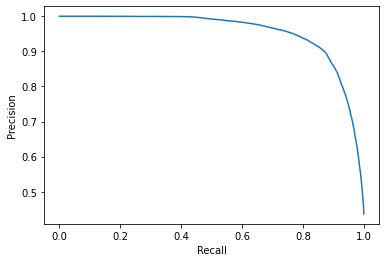

In [114]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')


AUC for Bagging : 0.952402924641279


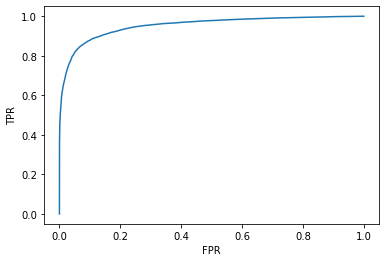

In [111]:
fpr, tpr, threshold = roc_curve(y_test, proba_em)
# Generate Figure
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
print("AUC for Bagging :", roc_auc_score(y_test, proba_em))

## Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rnd_clf = RandomForestClassifier(n_estimators=200, max_samples=100, random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_samples=100, n_estimators=200, random_state=42)

In [60]:
print("Accuracy of test is:",rnd_clf.score(X_test, y_test))
print("Accuracy of training is:",rnd_clf.score(X_train, y_train))

Accuracy of test is: 0.898265065188379
Accuracy of training is: 0.8991266663733556


In [61]:
y_test_pred_rf = rnd_clf.predict(X_test)

TP is: 14444
TN is: 18804
FP is: 3306
FN is: 2410


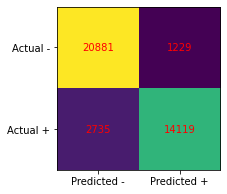

In [105]:
rslt_rf = confusion_matrix(y_test, y_test_pred_rf)
rslt_rf
print("TP is:", rslt[1, 1])
print("TN is:", rslt[0, 0])
print("FP is:", rslt[0 ,1])
print("FN is:", rslt[1, 0])
cm = rslt_rf

fig, ax = plt.subplots(figsize=(3,3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted -', 'Predicted +'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual -', 'Actual +'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [63]:
print('Precision score:', precision_score(y_test, y_test_pred_rf))
print('Recall score:', recall_score(y_test, y_test_pred_rf))
print('Accuracy score:', accuracy_score(y_test, y_test_pred_rf))
print('F1 score:', f1_score(y_test, y_test_pred_rf))

proba_rf = rnd_clf.predict_proba(X_test)[:, 1]

Precision score: 0.9199244201198853
Recall score: 0.8377239824374035
Accuracy score: 0.898265065188379
F1 score: 0.8769020557729332


In [64]:
precision, recall, threshold = precision_recall_curve(y_test, proba_rf)

Text(0, 0.5, 'Precision')

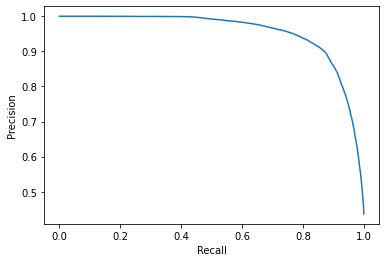

In [113]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')


AUC for Random Forest : 0.9569954699677659


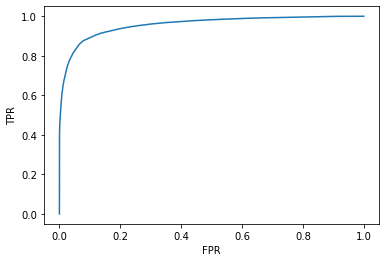

In [112]:
fpr, tpr, threshold = roc_curve(y_test, proba_rf)
# Generate Figure
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
print("AUC for Random Forest :", roc_auc_score(y_test, proba_rf))

In [67]:
rslt,rslt_dt,rslt_em,rslt_rf

(array([[18804,  3306],
        [ 2410, 14444]], dtype=int64),
 array([[20543,  1567],
        [ 3496, 13358]], dtype=int64),
 array([[20593,  1517],
        [ 2562, 14292]], dtype=int64),
 array([[20881,  1229],
        [ 2735, 14119]], dtype=int64))

In [76]:
#Understanding the important features:
pd.DataFrame({'Variable':X.columns,
              'Importance':rnd_clf.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
7,Online Boarding,0.145213
24,Business,0.069712
15,In-flight Wifi Service,0.064756
16,In-flight Entertainment,0.062855
22,Busines,0.052689
23,Personal,0.051782
1,Flight Distance,0.051713
10,Seat Comfort,0.051606
0,Age,0.046592
11,Leg Room Service,0.040376
